<a href="https://colab.research.google.com/github/farielshafee2018/google-data-anlytics-sailsfor-HR-/blob/main/Salifort_Motors_project_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


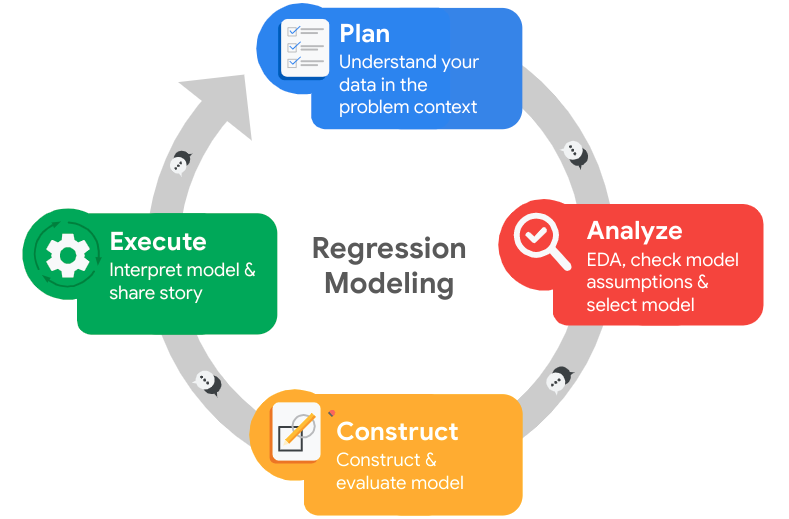

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The major stakeholders here are both the company and the employees though the work is paid for by the company and the company's interests are of concern.  It takes money to hire a new employee and so it is of interest to a company to retain employees.  However, employees also benefit from this analysis since their conditions are scrutinized in an attempt to keep their jobs secure.
The initial observations are that much of the data is already normalized, such as satisfaction level.  It might be of interest to create some further subcategories within datasets to create tractable models.
The main ethical concern is the company's interest and the employees' interests may not always be the same and may be conflicting.  The project, though, is paid for by the company and the main issue is to look at the financial benefit of the company since it is the company who has commissioned the project.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [10]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
### YOUR CODE HERE ###
#df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
#df0.head()
from google.colab import files
import io

uploaded = files.upload()


Saving HR_Sailfort_dataset_Processed.csv to HR_Sailfort_dataset_Processed (4).csv


In [15]:

for key in uploaded:
  df0= pd.read_csv(io.BytesIO(uploaded[key]))


df0.head()

,Unnamed: 0,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [16]:
# Gather basic information about the data
df0.shape


(11991, 19)

### Gather descriptive statistics about the data

In [17]:
# Gather descriptive statistics about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              11991 non-null  int64  
 1   satisfaction_level      11991 non-null  float64
 2   last_evaluation         11991 non-null  float64
 3   number_project          11991 non-null  int64  
 4   average_montly_hours    11991 non-null  int64  
 5   tenure                  11991 non-null  int64  
 6   work_accident           11991 non-null  int64  
 7   left                    11991 non-null  int64  
 8   promotion_last_5years   11991 non-null  int64  
 9   salary                  11991 non-null  int64  
 10  department_RandD        11991 non-null  bool   
 11  department_accounting   11991 non-null  bool   
 12  department_hr           11991 non-null  bool   
 13  department_management   11991 non-null  bool   
 14  department_marketing    11991 non-null

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [18]:
# Display all column names
df0.columns


Index(['Unnamed: 0', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'salary', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

In [19]:
# Rename columns as needed
df0=df0.rename(columns={"Work_accident":"work_accident","average_montly_hours":"ave_monthly_hours","Department":"department","time_spend_company":"tenure"})


# Display all column names after the update
print(df0)


       Unnamed: 0  satisfaction_level  last_evaluation  number_project  \
0               0                0.38             0.53               2   
1               1                0.80             0.86               5   
2               2                0.11             0.88               7   
3               3                0.72             0.87               5   
4               4                0.37             0.52               2   
...           ...                 ...              ...             ...   
11986       11995                0.90             0.55               3   
11987       11996                0.74             0.95               5   
11988       11997                0.85             0.54               3   
11989       11998                0.33             0.65               3   
11990       11999                0.50             0.73               4   

       ave_monthly_hours  tenure  work_accident  left  promotion_last_5years  \
0                    157       

### Check missing values

Check for any missing values in the data.

In [20]:
# Check for missing values
df0.isna().sum()


,0
Unnamed: 0,0
satisfaction_level,0
last_evaluation,0
number_project,0
ave_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
salary,0


### Check duplicates

Check for any duplicate entries in the data.

In [21]:
# Check for duplicates
df0.duplicated().sum()


np.int64(0)

In [ ]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###


In [22]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1=df0.drop_duplicates(keep="first")


# Display first few rows of new dataframe as needed
df1.head()


,Unnamed: 0,satisfaction_level,last_evaluation,number_project,ave_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


### Check outliers

Check for outliers in the data.

<Axes: xlabel='tenure'>

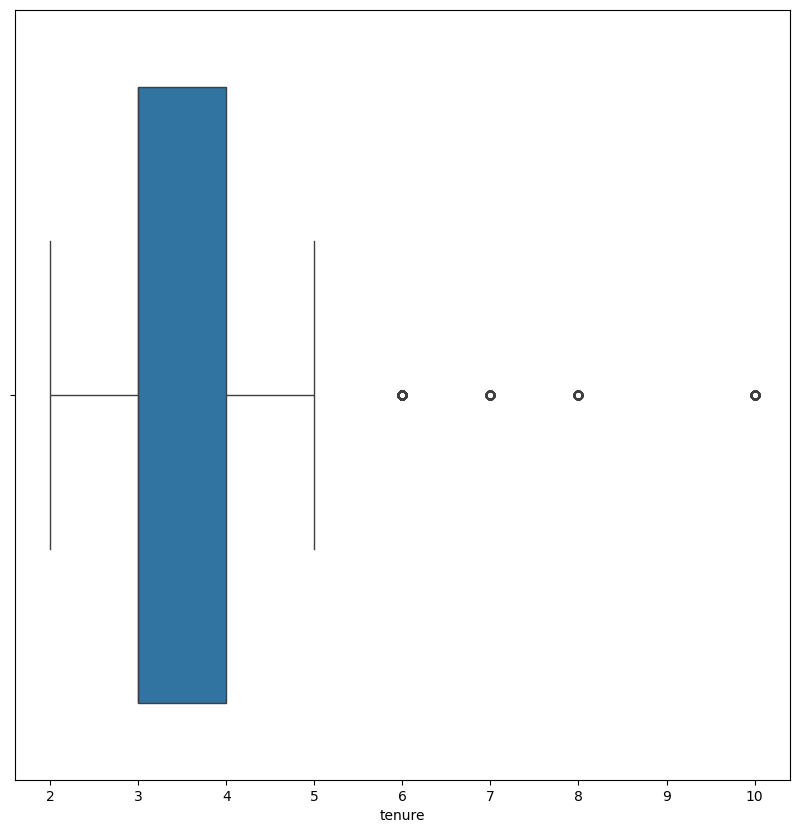

In [23]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(10,10))
sb.boxplot(x=df1["tenure"])



In [24]:
# Determine the number of rows containing outliers
perc25=df1["tenure"].quantile(.25)
perc75=df1["tenure"].quantile(.75)
accepted = 1.5*(perc75-perc25)
upper=perc75+accepted
lower=perc25-accepted
outlier=df1[(df1["tenure"]>upper)|(df1["tenure"]<lower)]
print(len(outlier))



824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The data seemed mostly clean.  However, there were quite a few duplicates that were discarded.  Also, outlier datapoints (824) existed and were taken out.  The outliers mostly were long term employees.  Hence, some employees seemed to be with the company for an unusually long time, though they were not part of a statistical trend.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [25]:
# Get numbers of people who left vs. stayed
df1["left"].sum()

# Get percentages of people who left vs. stayed
perc=df1["left"].sum()/df1.count().sum()
print(perc)


0.00873901039814949


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

<Axes: xlabel='ave_monthly_hours', ylabel='number_project'>

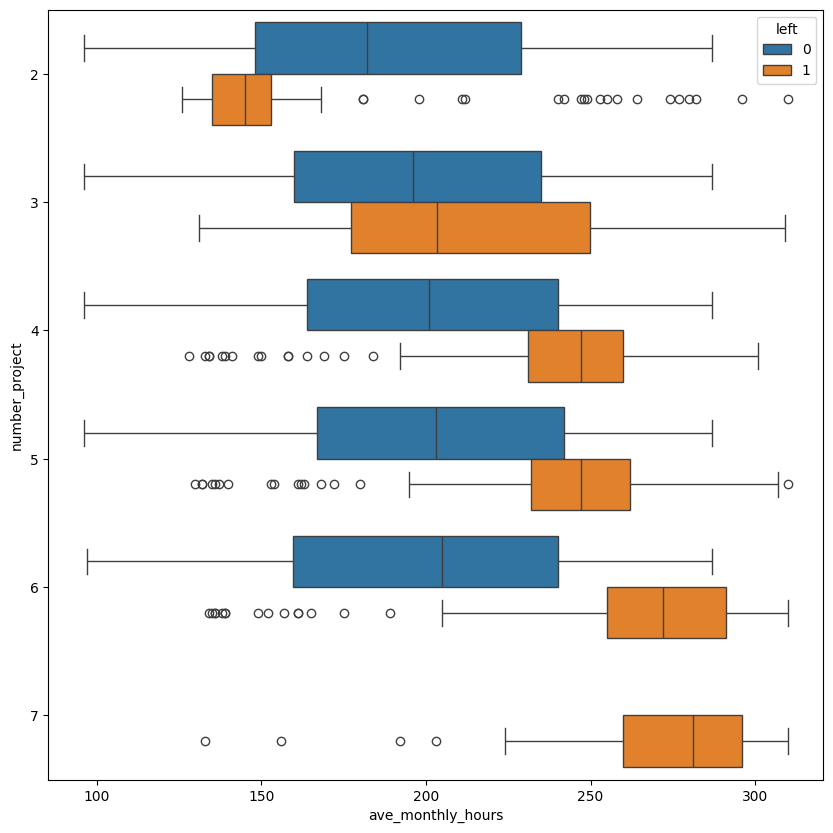

In [26]:
# Create a plot as needed
plt.figure(figsize=(10,10))
sb.boxplot(data = df1, x="ave_monthly_hours",y="number_project",hue="left", orient="h")


<Axes: xlabel='number_project', ylabel='Count'>

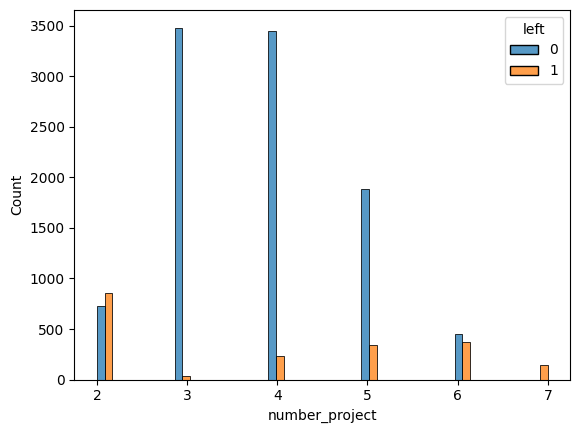

In [27]:
# Create a plot as needed
tenure_stay=df1[df1["left"]==0]["number_project"]
tenure_leave=df1[df1["left"]==1]["number_project"]
sb.histplot(data=df1,x="number_project",hue="left", multiple="dodge")


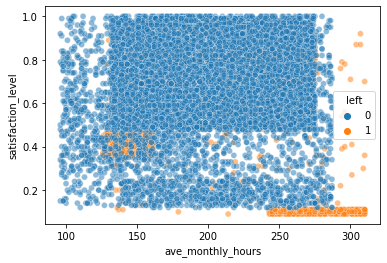

In [ ]:
# Create a plot as needed
sb.scatterplot(data=df1,x="ave_monthly_hours",y="satisfaction_level",hue="left", alpha=.5)


<Axes: xlabel='ave_monthly_hours', ylabel='Count'>

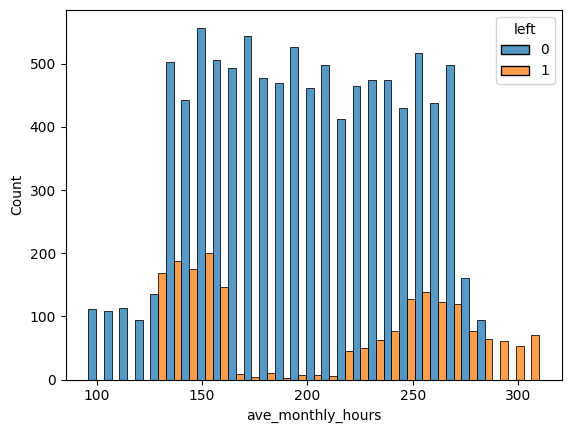

In [29]:
# plot time vs whether keft or not
tenure_stay=df1[df1["left"]==0]["ave_monthly_hours"]
tenure_leave=df1[df1["left"]==1]["ave_monthly_hours"]
sb.histplot(data=df1,x="ave_monthly_hours",hue="left", multiple="dodge")


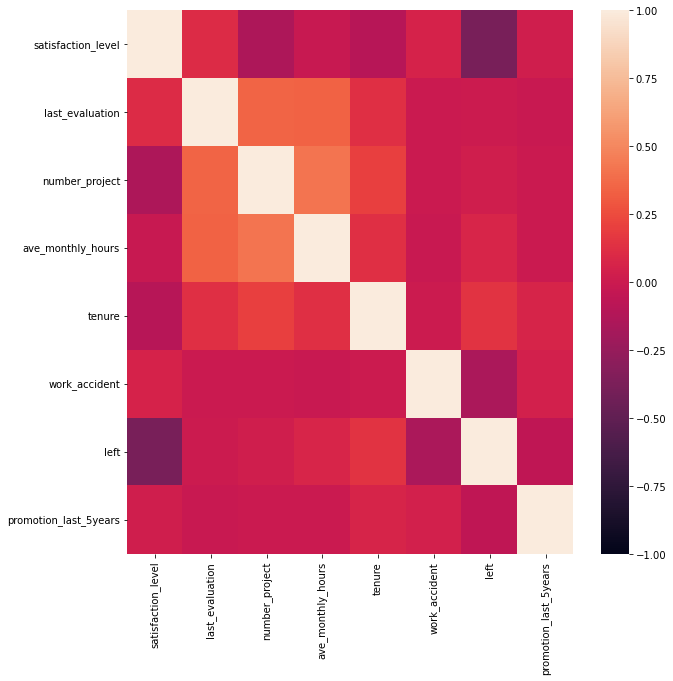

In [ ]:
# Create a plot as needed
plt.figure(figsize=(10,10))
sb.heatmap(df0.corr(),vmin=-1,vmax=1)

<Axes: xlabel='salary', ylabel='Count'>

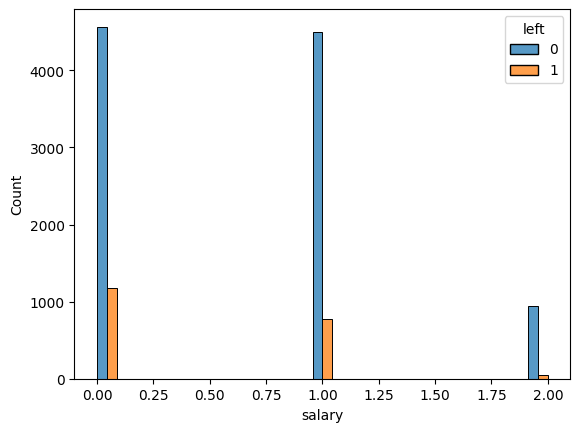

In [30]:
# Create a plot with salary vs whether left or not
# plot time vs whether keft or not
tenure_stay=df1[df1["left"]==0]["salary"]
tenure_leave=df1[df1["left"]==1]["salary"]
sb.histplot(data=df1,x="salary",hue="left", multiple="dodge")


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


### Insights

From the plots above, it seemed evident, that employees left 1. if they had very few projects and 2. if they had too many projects.  Also, evaluations had some degree of correlation with number of hours and projects.  Hence, it seemed that the employees who did not perform well had few projects and some left.  Also some of the top performing emplyees were overloaded and left.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



We observe that there were some outliers.  There were also some low level of multicolinearity between last evaluation and number of hours and number of projects.  We also see that teh salary column is not in numbers and hence need to be codified first.  From observing the results, we see that tenure is not completely linear with leaving but has two peaks. Hence, we need to choose a variable that has some type of linear relation with leaving.  We choose salary and hours spent fit it with leaving.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We aim to predict tenure length based on variables that are independent and linear using logistic relation.  Hence, think of using salary and satisfaction level as X variables.  However, since salary is correlated with satisfaction level, we use salary.

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [33]:
# first we change the salary bins into numbers
df_enc=df1.copy()
df_enc["salary"]=(df_enc["salary"].astype("category").cat.set_categories(["low","medium","high"]).cat.codes)
df_enc=pd.get_dummies(df_enc,drop_first="False")
df_enc.head()

,Unnamed: 0,satisfaction_level,last_evaluation,number_project,ave_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0,0.38,0.53,2,157,3,0,1,0,-1,False,False,False,False,False,False,True,False,False
1,1,0.80,0.86,5,262,6,0,1,0,-1,False,False,False,False,False,False,True,False,False
2,2,0.11,0.88,7,272,4,0,1,0,-1,False,False,False,False,False,False,True,False,False
3,3,0.72,0.87,5,223,5,0,1,0,-1,False,False,False,False,False,False,True,False,False
4,4,0.37,0.52,2,159,3,0,1,0,-1,False,False,False,False,False,False,True,False,False


In [91]:
# lets split data into test and train  First let's define categories

X = df_enc[["satisfaction_level","salary", "ave_monthly_hours","work_accident", "promotion_last_5years"]]
Y = df_enc["left"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2, random_state=42)


In [82]:
X_test.shape

(2399, 4)

In [83]:
Y_test.shape

(2399,)

In [84]:

X_train.shape

(9592, 4)

In [85]:
Y_train.shape

(9592,)

In [92]:
model = LogisticRegression()

In [93]:
Y_pred = model.fit(X_train, Y_train)

In [94]:
Y_pred = model.predict(X_test)

print(Y_pred)

[1 0 0 ... 0 0 0]


In [95]:
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.8570237598999583


In [96]:
statistics = confusion_matrix(Y_test, Y_pred)
print(statistics)

[[1967   31]
 [ 312   89]]


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [ ]:
#The model is not completely accurate but predicts most of both the positive and the negative values.  Hence, it is possibly
# to predict how some of the people would leave and focus on retaining them.

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.